## Create plot comparing Diaper Need in TN to US need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
#import tn_us_diaper csv
tn_us = pd.read_csv('../data/tn_us_diaper.csv')
tn_us.head()

,US and Tennessee Diaper Facts - https://nationaldiaperbanknetwork.org/wp-content/uploads/2020/03/2019_State_Diaper_Facts_12_2019_Tennessee.pdf,Total Pop Under Age 3,% of children under age 18 are infants or toddlers,% Live in families earning less than 100% of FPL,% Live in families earning 100% to 200% of FPL,Unnamed: 5,Percentage of Births Covered by Medicaid,Percentage of WIC Recipients that Are Infants,Percentage of TANF Families with at Least One Child Under Age 3,Percentage of SNAP Recipients Under Age 5,...,Children Under Age 3 Receiving Federal Child Support,0.4,The only federal assistance program that can be used for diapers is TANF,"Max Benefit for Family of 3 (1 Parent & 2 Children) - July, 2020",Diaper Costs Compared to Benefit - 29%,0.5,"Number of Diaper Banks - 5 donating 1,056,699",50 diapers per child per month,Infants and toddlers helped monthly,Diapers distributed annually
0,TN,241516,0.16,0.15,0.23,NaN,0.51,0.26,0.30,0.14,...,0.41,0,0,277,0.29,0,5,80,1761,1056699
1,US,11752545,0.16,0.20,0.22,NaN,0.43,0.23,0.32,0.13,...,0.28,0,0,477,0.29,0,200,80,197000,68000000


In [3]:
#only keep needed columns
tn_us = tn_us[['US and Tennessee Diaper Facts - https://nationaldiaperbanknetwork.org/wp-content/uploads/2020/03/2019_State_Diaper_Facts_12_2019_Tennessee.pdf',
                             'Total Pop Under Age 3',
                             'Percentage of Births Covered by Medicaid',
                             'Percentage of WIC Recipients that Are Infants',
                             'Percentage of TANF Families with at Least One Child Under Age 3',
                             'Single-Parent Households',
                             'Children Under Age 3 Receiving Federal Child Support',
                             'Diaper Costs Compared to Benefit - 29%'
                            ]].copy()
tn_us.head()

,US and Tennessee Diaper Facts - https://nationaldiaperbanknetwork.org/wp-content/uploads/2020/03/2019_State_Diaper_Facts_12_2019_Tennessee.pdf,Total Pop Under Age 3,Percentage of Births Covered by Medicaid,Percentage of WIC Recipients that Are Infants,Percentage of TANF Families with at Least One Child Under Age 3,Single-Parent Households,Children Under Age 3 Receiving Federal Child Support,Diaper Costs Compared to Benefit - 29%
0,TN,241516,0.51,0.26,0.30,0.40,0.41,0.29
1,US,11752545,0.43,0.23,0.32,0.44,0.28,0.29


In [4]:
#rename columns
tn_us = tn_us.rename(columns = {'US and Tennessee Diaper Facts - https://nationaldiaperbanknetwork.org/wp-content/uploads/2020/03/2019_State_Diaper_Facts_12_2019_Tennessee.pdf':'area',
                                 'Total Pop Under Age 3':'pop_under_3',
                                 'Percentage of Births Covered by Medicaid':'medicare_births',
                                 'Percentage of WIC Recipients that Are Infants':'wic_infants',
                                 'Percentage of TANF Families with at Least One Child Under Age 3':'tanf_under_3',
                                 'Single-Parent Households':'single_parent_households',
                                 'Children Under Age 3 Receiving Federal Child Support':'under_3_fed_support',
                                 'Diaper Costs Compared to Benefit - 29%':'diaper_cost_of_tanf'
                                             })
tn_us.columns

Index(['area', 'pop_under_3', 'medicare_births', 'wic_infants', 'tanf_under_3',
       'single_parent_households', 'under_3_fed_support',
       'diaper_cost_of_tanf'],
      dtype='object')

In [5]:
#import immunization csv
immunizations = pd.read_csv('../data/immunizations.csv')
immunizations.head()

,avg children/family us,avg children/family ndc survey,TN rate,Healthy People Std,immunization rate 1 child,immunization rate 2 kids,immunization rate 3 kids,immunization rate public health,immunization rate private health,immunizations at ndc events
0,1.93,3.15,0.72,0.8,0.81,0.71,0.63,0.63,0.69,0.14


In [6]:
#add immunization column
tn_us['immunization']=''
tn_us.head()

,area,pop_under_3,medicare_births,wic_infants,tanf_under_3,single_parent_households,under_3_fed_support,diaper_cost_of_tanf,immunization
0,TN,241516,0.51,0.26,0.30,0.40,0.41,0.29,
1,US,11752545,0.43,0.23,0.32,0.44,0.28,0.29,


In [7]:
#move values from immunizations to tn_us
tn_us.iloc[0,8] = immunizations.iloc[0,2]
tn_us.iloc[1,8] = immunizations.iloc[0,3]
#tn_us.iloc[:1, 'immunization'] = immunizations.loc[:0,'Healthy People Std']
tn_us

,area,pop_under_3,medicare_births,wic_infants,tanf_under_3,single_parent_households,under_3_fed_support,diaper_cost_of_tanf,immunization
0,TN,241516,0.51,0.26,0.30,0.40,0.41,0.29,0.72
1,US,11752545,0.43,0.23,0.32,0.44,0.28,0.29,0.8


In [8]:
#multiply column values by 100
tn_us['medicare_births'] = tn_us['medicare_births']*100
tn_us['wic_infants'] = tn_us['wic_infants']*100
tn_us['tanf_under_3'] = tn_us['tanf_under_3']*100
tn_us['single_parent_households'] = tn_us['single_parent_households']*100
tn_us['under_3_fed_support'] = tn_us['under_3_fed_support']*100
tn_us['diaper_cost_of_tanf'] = tn_us['diaper_cost_of_tanf']*100
tn_us['immunization'] = tn_us['immunization']*100
tn_us

,area,pop_under_3,medicare_births,wic_infants,tanf_under_3,single_parent_households,under_3_fed_support,diaper_cost_of_tanf,immunization
0,TN,241516,51.0,26.0,30.0,40.0,41.0,29.0,72
1,US,11752545,43.0,23.0,32.0,44.0,28.0,29.0,80


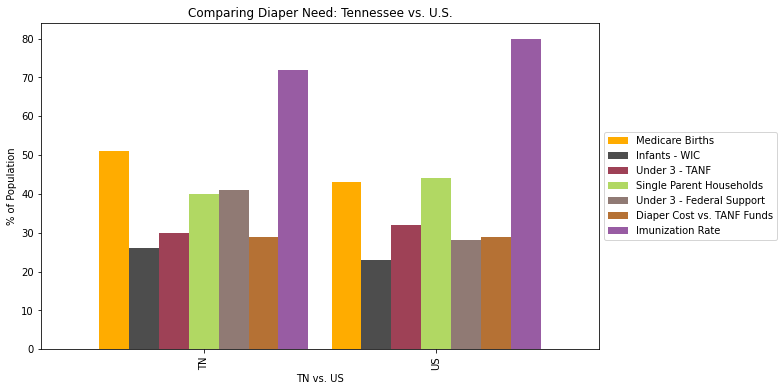

In [14]:
#create plot
ax=tn_us.plot(x="area", y=['medicare_births',
                        'wic_infants',
                        'tanf_under_3',
                        'single_parent_households',
                        'under_3_fed_support',
                        'diaper_cost_of_tanf',
                        'immunization'
                       ], kind="bar",figsize=(10, 6), width=0.9, color=['#ffac00', '#4d4d4d', '#9e4156', '#b1d863', '#907a74', '#b57134','#985ca3']
)
plt.xlabel("TN vs. US")
plt.ylabel("% of Population")
plt.title("Comparing Diaper Need: Tennessee vs. U.S.")

ax.legend(['Medicare Births',
            'Infants - WIC',
            'Under 3 - TANF',
            'Single Parent Households',
            'Under 3 - Federal Support',
            'Diaper Cost vs. TANF Funds',
            'Imunization Rate'],loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('../files/tn_us.plot.png',bbox_inches='tight', dpi=300)
plt.show();

In [ ]:
#get colors right #4e5e80 #5ba3b5